# LEAD SCORING CASE STUDY

## GROUP - 
### Badal Autade
### Akshay Kumar
### Nikhil Choithani

## Importing the required Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import sklearn
import statsmodels.api as sm

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics

In [5]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [6]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

In [7]:
 pd.set_option('display.max_columns', None)

## Reading and Checking the Data Set

In [8]:
# Reading the dataset
data = pd.read_csv('Leads.csv')
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [9]:
# Checking the shape of Dataset
data.shape

(9240, 37)

In [10]:
# Getting the information of Dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [11]:
# Geting the description of numerical variables of Dataset
data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## Cleaning and Imputing the Data Set

In [12]:
# Checking for number of null values in each column
data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [13]:
# Geting descending view of percentage null values in dataset
Null_list = data.isnull().sum()/len(data)*100
Null_list = Null_list.sort_values(ascending = False)
Null_list

Lead Quality                                     51.590909
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Index                       45.649351
Tags                                             36.287879
Lead Profile                                     29.318182
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

- Columns containing more than 30% null values are of no use and thus should be eliminated

In [14]:
# Getting list of columns which have null values more than 30%
Null_list = Null_list[Null_list > 30]

In [15]:
# Checking the no of columns containing more than 30% of null values
len(Null_list)

6

In [16]:
# Dropping the columns containing more than 30% null values
data = data.drop(columns = Null_list.index)

In [17]:
# Getting all the column names of dataset
data.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

- Create the list of column names which should be dropped 

In [18]:
# Adding Prospect ID and Lead No to drop columns as each value is unique and hence will not provide any significant information
drop_columns = ['Prospect ID', 'Lead Number']

- Check values present under each column and remove/impute if required or else drop column if found imbalanced.

In [19]:
data.value_counts('Lead Origin', dropna = False)

Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
dtype: int64

In [20]:
data.value_counts('Lead Source', dropna = False)

Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
Pay per Click Ads       1
NC_EDM                  1
WeLearn                 1
blog                    1
testone                 1
welearnblog_Home        1
youtubechannel          1
dtype: int64

In [21]:
# Drop the 36 rows which are blank and are insignificant in numbers.
data = data[~pd.isnull(data['Lead Source'])]

- Google is written as google in same column so we need to fix this

In [22]:
data['Lead Source'] = data['Lead Source'].apply(lambda x:x.capitalize())

In [23]:
data.value_counts('Lead Source')

Lead Source
Google               2873
Direct traffic       2543
Olark chat           1755
Organic search       1154
Reference             534
Welingak website      142
Referral sites        125
Facebook               55
Bing                    6
Click2call              4
Live chat               2
Press_release           2
Social media            2
Welearn                 1
Welearnblog_home        1
Pay per click ads       1
Testone                 1
Blog                    1
Nc_edm                  1
Youtubechannel          1
dtype: int64

In [24]:
data.value_counts('Do Not Email', dropna = False)

Do Not Email
No     8483
Yes     721
dtype: int64

- As we can see, above column is severely imbalanced it can be deleted

In [25]:
# Adding above column to drop_column list.
drop_columns.append('Do Not Email')

In [26]:
data.value_counts('Do Not Call', dropna = False)

Do Not Call
No     9202
Yes       2
dtype: int64

- As we can see, above column is severely imbalanced it can be deleted

In [27]:
# Adding above column to drop_column list.
drop_columns.append('Do Not Call')

In [28]:
data.value_counts('Converted', dropna = False)

Converted
0    5672
1    3532
dtype: int64

In [29]:
data.value_counts('TotalVisits', dropna = False)

TotalVisits
0.0      2161
2.0      1679
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
NaN       130
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
23.0        6
21.0        6
24.0        5
27.0        5
25.0        5
22.0        3
29.0        2
26.0        2
28.0        2
30.0        1
32.0        1
41.0        1
43.0        1
54.0        1
55.0        1
74.0        1
115.0       1
141.0       1
251.0       1
42.0        1
dtype: int64

In [30]:
# Drop the 130 NAN/ null values present in the TotalVisits column.
data = data[~pd.isnull(data['TotalVisits'])]

In [31]:
data.value_counts('Total Time Spent on Website', dropna = False)

Total Time Spent on Website
0       2165
60        19
127       18
75        18
157       17
        ... 
1355       1
600        1
601        1
603        1
2272       1
Length: 1717, dtype: int64

In [32]:
data.value_counts('Page Views Per Visit', dropna = False)

Page Views Per Visit
0.00     2161
2.00     1794
3.00     1196
4.00      896
1.00      651
         ... 
3.57        1
3.80        1
3.82        1
3.83        1
55.00       1
Length: 114, dtype: int64

In [33]:
data.value_counts('Last Activity', dropna = False)

Last Activity
Email Opened                    3432
SMS Sent                        2716
Olark Chat Conversation          972
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    312
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       90
Unsubscribed                      59
Had a Phone Conversation          25
View in browser link Clicked       6
Approached upfront                 5
Email Received                     2
Email Marked Spam                  2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
dtype: int64

In [34]:
data.value_counts('Country', dropna = False)

Country
India                   6491
NaN                     2296
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
France                     6
Oman                       6
unknown                    5
Germany                    4
South Africa               4
Kuwait                     4
Canada                     4
Nigeria                    4
Sweden                     3
Uganda                     2
Philippines                2
Asia/Pacific Region        2
Italy                      2
Ghana                      2
China                      2
Belgium                    2
Bangladesh                 2
Netherlands                2
Malaysia                   1
Russia                     1
Liberia                    1
Kenya                      1
Sri Lanka                  1
Indone

- As we can see, above column will be severely imbalanced after imputing null values with MODE it can be deleted

In [35]:
# Adding above column to drop_column list.
drop_columns.append('Country')

In [36]:
data.value_counts('Specialization', dropna = False)

Specialization
Select                               1851
NaN                                  1431
Finance Management                    959
Human Resource Management             837
Marketing Management                  823
Operations Management                 499
Business Administration               399
IT Projects Management                366
Supply Chain Management               346
Banking, Investment And Insurance     335
Media and Advertising                 202
Travel and Tourism                    202
International Business                176
Healthcare Management                 156
Hospitality Management                111
E-COMMERCE                            111
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
dtype: int64

In [37]:
# Replacing 'Select' & 'NaN' vaues with 'Unknown'
data['Specialization'] = data['Specialization'].replace(np.NaN, 'Unknown')
data['Specialization'] = data['Specialization'].replace('Select', 'Unknown')


In [38]:
data.value_counts('How did you hear about X Education', dropna = False)

How did you hear about X Education
Select                   4886
NaN                      2200
Online Search             808
Word Of Mouth             347
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               66
Email                      26
SMS                        23
dtype: int64

- As we can see, above column will be severely imbalanced after imputing null values with MODE it can be deleted

In [39]:
# Adding above column to drop_column list.
drop_columns.append('How did you hear about X Education')

In [40]:
data.value_counts('What is your current occupation', dropna = False)

What is your current occupation
Unemployed              5476
NaN                     2683
Working Professional     677
Student                  206
Other                     15
Housewife                  9
Businessman                8
dtype: int64

- As we can see, above column will be severely imbalanced after imputing null values with MODE it can be deleted

In [41]:
# Adding above column to drop_column list.
drop_columns.append('What is your current occupation')

In [42]:
data.value_counts('What matters most to you in choosing a course', dropna = False)

What matters most to you in choosing a course
Better Career Prospects      6370
NaN                          2702
Flexibility & Convenience       1
Other                           1
dtype: int64

- As we can see, above column will be severely imbalanced after imputing null values with MODE it can be deleted

In [43]:
# Adding above column to drop_column list.
drop_columns.append('What matters most to you in choosing a course')

In [44]:
data.value_counts('Search', dropna = False)

Search
No     9060
Yes      14
dtype: int64

- As we can see, above column is severely imbalanced it can be deleted

In [45]:
# Adding above column to drop_column list.
drop_columns.append('Search')

In [46]:
data.value_counts('Magazine', dropna = False)

Magazine
No    9074
dtype: int64

- As we can see, above column is severely imbalanced it can be deleted

In [47]:
# Adding above column to drop_column list.
drop_columns.append('Magazine')

In [48]:
data.value_counts('Newspaper Article', dropna = False)

Newspaper Article
No     9072
Yes       2
dtype: int64

- As we can see, above column is severely imbalanced it can be deleted

In [49]:
# Adding above column to drop_column list.
drop_columns.append('Newspaper Article')

In [50]:
data.value_counts('X Education Forums', dropna = False)

X Education Forums
No     9073
Yes       1
dtype: int64

- As we can see, above column is severely imbalanced it can be deleted

In [51]:
# Adding above column to drop_column list.
drop_columns.append('X Education Forums')

In [52]:
data.value_counts('Newspaper', dropna = False)

Newspaper
No     9073
Yes       1
dtype: int64

- As we can see, above column is severely imbalanced it can be deleted

In [53]:
# Adding above column to drop_column list.
drop_columns.append('Newspaper')

In [54]:
data.value_counts('Digital Advertisement', dropna = False)

Digital Advertisement
No     9070
Yes       4
dtype: int64

- As we can see, above column is severely imbalanced it can be deleted

In [55]:
# Adding above column to drop_column list.
drop_columns.append('Digital Advertisement')

In [56]:
data.value_counts('Through Recommendations', dropna = False)

Through Recommendations
No     9067
Yes       7
dtype: int64

- As we can see, above column is severely imbalanced it can be deleted

In [57]:
# Adding above column to drop_column list.
drop_columns.append('Through Recommendations')

In [58]:
data.value_counts('Receive More Updates About Our Courses', dropna = False)

Receive More Updates About Our Courses
No    9074
dtype: int64

- As we can see, above column is severely imbalanced it can be deleted

In [59]:
# Adding above column to drop_column list.
drop_columns.append('Receive More Updates About Our Courses')

In [60]:
data.value_counts('Update me on Supply Chain Content', dropna = False)

Update me on Supply Chain Content
No    9074
dtype: int64

- As we can see, above column is severely imbalanced it can be deleted

In [61]:
# Adding above column to drop_column list.
drop_columns.append('Update me on Supply Chain Content')

In [62]:
data.value_counts('Get updates on DM Content', dropna = False)

Get updates on DM Content
No    9074
dtype: int64

- As we can see, above column is severely imbalanced it can be deleted

In [63]:
# Adding above column to drop_column list.
drop_columns.append('Get updates on DM Content')

In [64]:
data.value_counts('Lead Profile', dropna = False)

Lead Profile
Select                         4055
NaN                            2702
Potential Lead                 1554
Other Leads                     482
Student of SomeSchool           240
Lateral Student                  21
Dual Specialization Student      20
dtype: int64

- As we can see, above column will be severely imbalanced after imputing null values with MODE it can be deleted

In [65]:
# Adding above column to drop_column list.
drop_columns.append('Lead Profile')

In [66]:
data.value_counts('City', dropna = False)

City
Mumbai                         3177
Select                         2156
NaN                            1419
Thane & Outskirts               745
Other Cities                    680
Other Cities of Maharashtra     446
Other Metro Cities              377
Tier II Cities                   74
dtype: int64

- As we can see, above column will be severely imbalanced after imputing null values with MODE it can be deleted

In [67]:
# Adding above column to drop_column list.
drop_columns.append('City')

In [68]:
data.value_counts('I agree to pay the amount through cheque', dropna = False)

I agree to pay the amount through cheque
No    9074
dtype: int64

- As we can see, above column is severely imbalanced it can be deleted

In [69]:
# Adding above column to drop_column list.
drop_columns.append('I agree to pay the amount through cheque')

In [70]:
data.value_counts('A free copy of Mastering The Interview', dropna = False)

A free copy of Mastering The Interview
No     6186
Yes    2888
dtype: int64

In [71]:
data.value_counts('Last Notable Activity', dropna = False)

Last Notable Activity
Modified                        3267
Email Opened                    2823
SMS Sent                        2152
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      45
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Email Received                     1
Form Submitted on Website          1
Resubscribed to emails             1
View in browser link Clicked       1
dtype: int64

In [72]:
# Checking the list of columns to be dropped
print(drop_columns)

['Prospect ID', 'Lead Number', 'Do Not Email', 'Do Not Call', 'Country', 'How did you hear about X Education', 'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'Lead Profile', 'City', 'I agree to pay the amount through cheque']


In [73]:
# Dropping the above columns from the dataset.
data = data.drop(drop_columns, axis = 1)

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 10 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9074 non-null   object 
 1   Lead Source                             9074 non-null   object 
 2   Converted                               9074 non-null   int64  
 3   TotalVisits                             9074 non-null   float64
 4   Total Time Spent on Website             9074 non-null   int64  
 5   Page Views Per Visit                    9074 non-null   float64
 6   Last Activity                           9074 non-null   object 
 7   Specialization                          9074 non-null   object 
 8   A free copy of Mastering The Interview  9074 non-null   object 
 9   Last Notable Activity                   9074 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 779.8+ KB


In [75]:
data.isnull().sum()

Lead Origin                               0
Lead Source                               0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

In [76]:
data.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark chat,0,0.0,0,0.0,Page Visited on Website,Unknown,No,Modified
1,API,Organic search,0,5.0,674,2.5,Email Opened,Unknown,No,Email Opened
2,Landing Page Submission,Direct traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Yes,Email Opened
3,Landing Page Submission,Direct traffic,0,1.0,305,1.0,Unreachable,Media and Advertising,No,Modified
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Unknown,No,Modified


In [77]:
data.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000,9074.000000
mean,0.378554,3.456028,482.887481,2.370151
std,0.485053,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,11.000000,1.000000
50%,0.000000,3.000000,246.000000,2.000000
75%,1.000000,5.000000,922.750000,3.200000
max,1.000000,251.000000,2272.000000,55.000000


<AxesSubplot:xlabel='TotalVisits'>

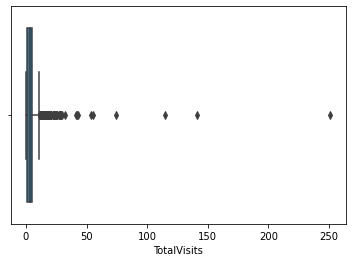

In [78]:
# Checking for Outliers in Numerical variables.

sns.boxplot(data['TotalVisits'])

<AxesSubplot:xlabel='Total Time Spent on Website'>

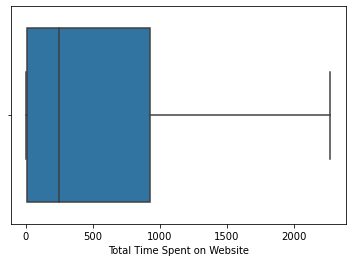

In [79]:
sns.boxplot(data['Total Time Spent on Website'])

<AxesSubplot:xlabel='Page Views Per Visit'>

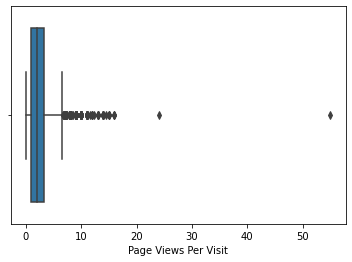

In [80]:
sns.boxplot(data['Page Views Per Visit'])

## Perform EDA

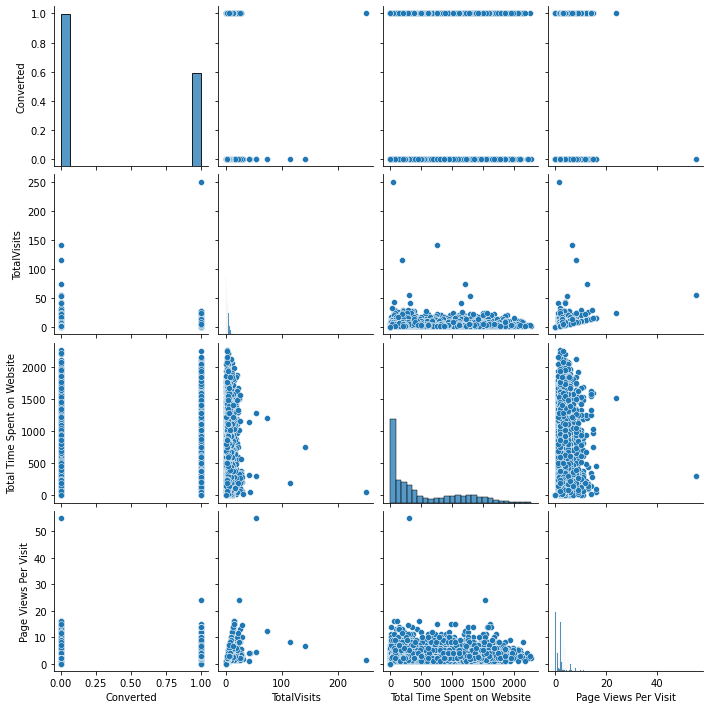

In [81]:
# Visualization of numerial variables.
sns.pairplot(data)
plt.show()

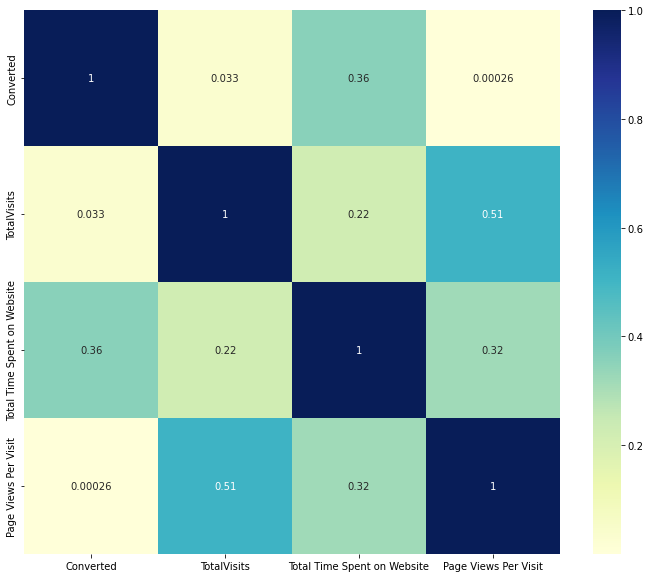

In [82]:
# Plot heatmap of numerical variables to understand correlation.

plt.figure(figsize=(12,10))
sns.heatmap(data.corr(), annot = True, cmap = 'YlGnBu')
plt.show()

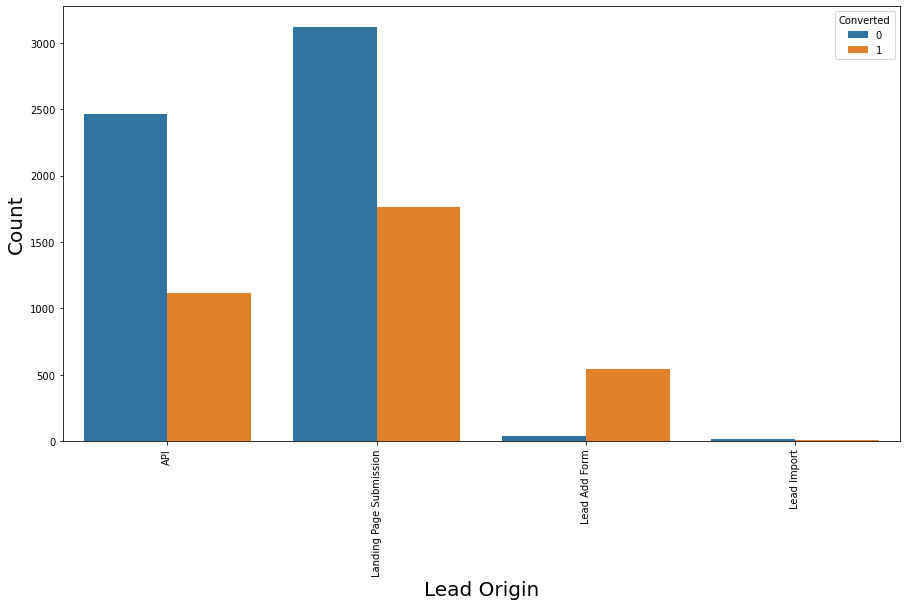

In [83]:
plt.figure(figsize=(15,8))
sns.countplot(data['Lead Origin'], hue = data.Converted)
plt.xticks(rotation = 90)
plt.xlabel('Lead Origin', fontsize = 20)
plt.ylabel('Count', fontsize = 20)
plt.show()

- Landing page submission category has highest numbers of converted leads.
- Lead Add Form category has more converted numbers than not converted.

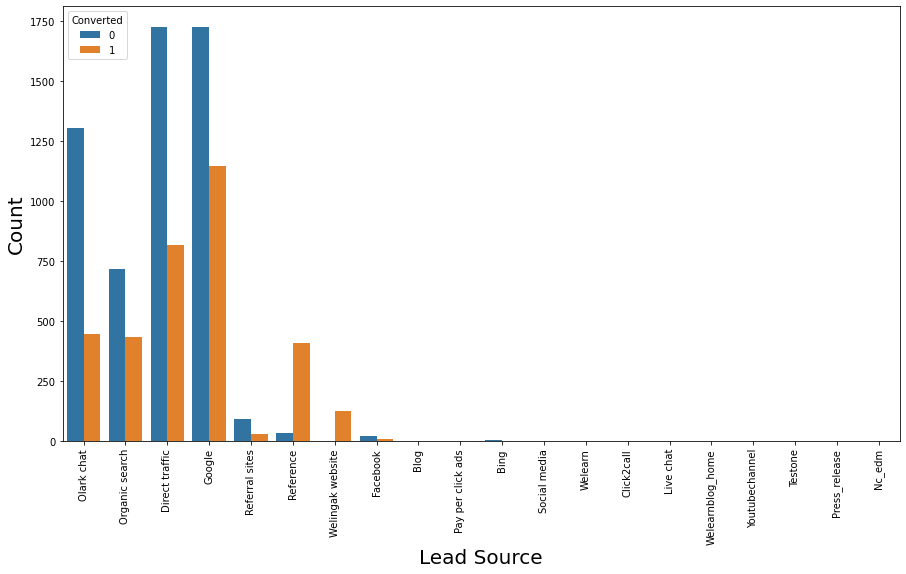

In [84]:
plt.figure(figsize=(15,8))
sns.countplot(data['Lead Source'], hue = data.Converted)
plt.xticks(rotation = 90)
plt.xlabel('Lead Source', fontsize = 20)
plt.ylabel('Count', fontsize = 20)
plt.show()

- Google as a Lead Source Category has highest numbers of converted people among all the rest of the categories.
- Whereas Referenced & Wellingak Website customers has highest rate of conversion in Lead Source column.

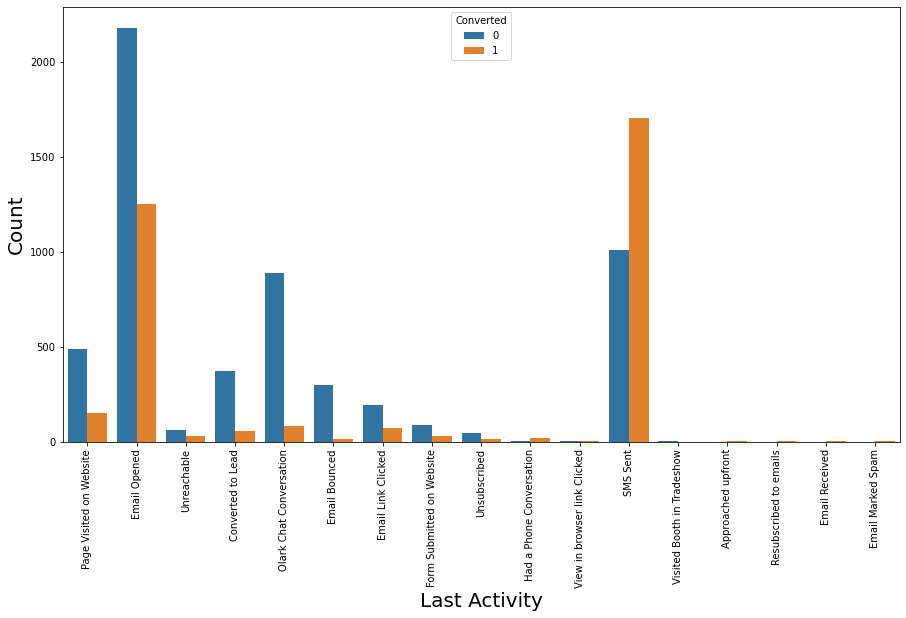

In [85]:
plt.figure(figsize=(15,8))
sns.countplot(data['Last Activity'], hue = data.Converted)
plt.xticks(rotation = 90)
plt.xlabel('Last Activity', fontsize = 20)
plt.ylabel('Count', fontsize = 20)
plt.show()

- SMS Sent category from the Last Activity column has highest numbers of converted customers, also it is the best category as it has highest rate of conversion(number of Non converted customers is low than the converted customers).

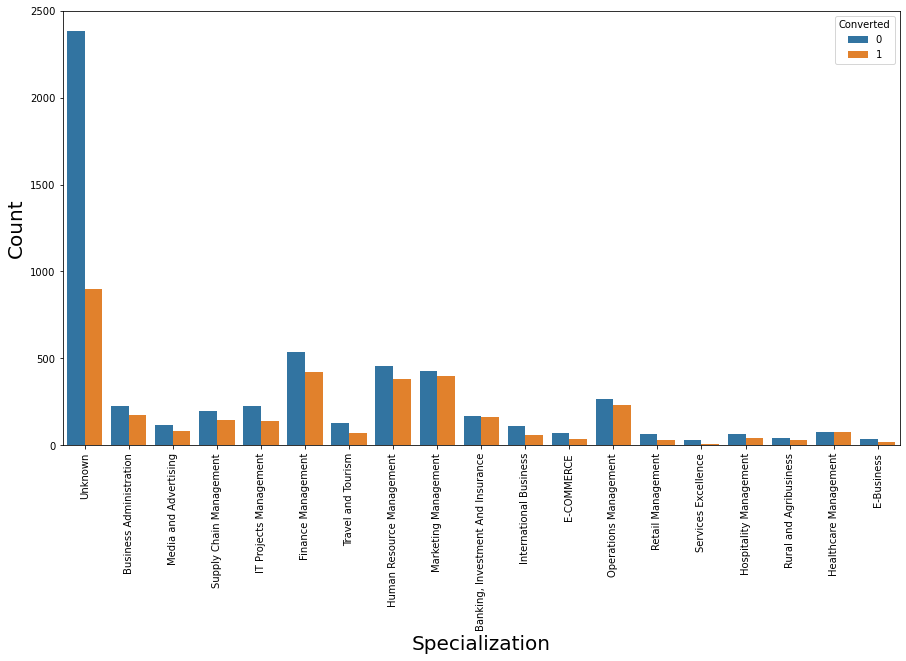

In [86]:
plt.figure(figsize=(15,8))
sns.countplot(data['Specialization'], hue = data.Converted)
plt.xticks(rotation = 90)
plt.xlabel('Specialization', fontsize = 20)
plt.ylabel('Count', fontsize = 20)
plt.show()

- Marketing, HR and Healthcare Management people has highest conversion rate, hence should be focused.

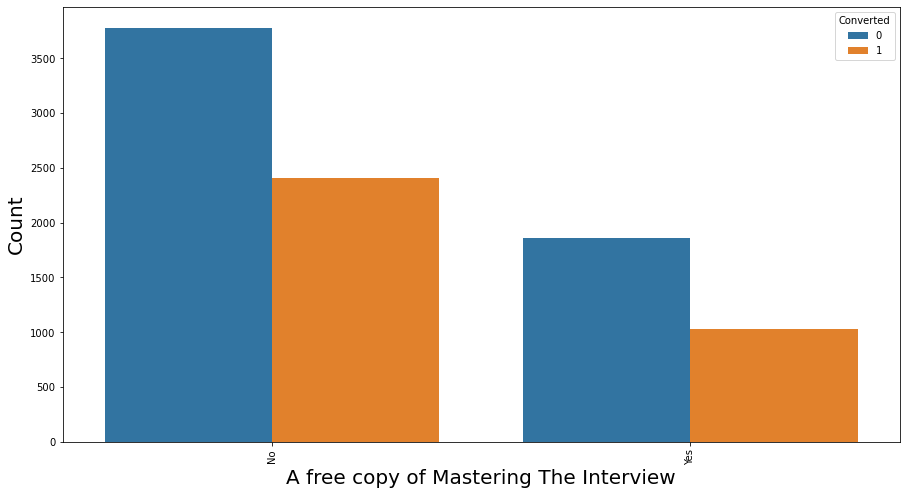

In [87]:
plt.figure(figsize=(15,8))
sns.countplot(data['A free copy of Mastering The Interview'], hue = data.Converted)
plt.xticks(rotation = 90)
plt.xlabel('A free copy of Mastering The Interview', fontsize = 20)
plt.ylabel('Count', fontsize = 20)
plt.show()

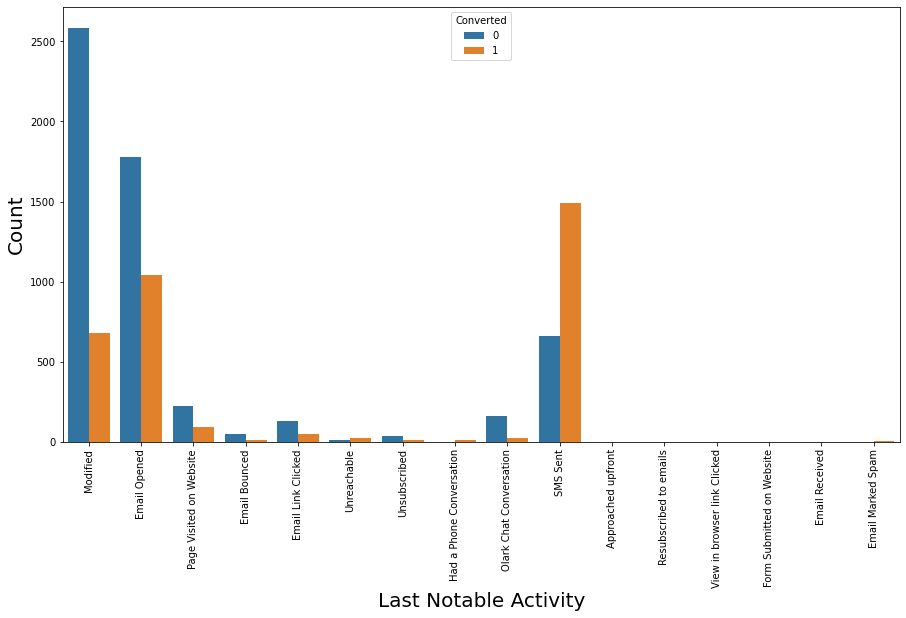

In [88]:
plt.figure(figsize=(15,8))
sns.countplot(data['Last Notable Activity'], hue = data.Converted)
plt.xticks(rotation = 90)
plt.xlabel('Last Notable Activity', fontsize = 20)
plt.ylabel('Count', fontsize = 20)
plt.show()

- SMS sent ctegory from above column has highest rate of conversion followed by Email opened category.

## Data Preparation for model building 

In [89]:
# Conversion of binary categorical variables into 0 & 1 categories.
binary_vars = ['A free copy of Mastering The Interview']

def binary_map(x):
    return x.map({'Yes':1, 'No':0})

# Apply the above function to the list of binary variables.

data[binary_vars] = data[binary_vars].apply(binary_map)

In [90]:
data.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark chat,0,0.0,0,0.0,Page Visited on Website,Unknown,0,Modified
1,API,Organic search,0,5.0,674,2.5,Email Opened,Unknown,0,Email Opened
2,Landing Page Submission,Direct traffic,1,2.0,1532,2.0,Email Opened,Business Administration,1,Email Opened
3,Landing Page Submission,Direct traffic,0,1.0,305,1.0,Unreachable,Media and Advertising,0,Modified
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Unknown,0,Modified


In [91]:
# Creating dummy variables for remaining categorical variables.

# Create Dummy variables for variable Lead Origin.
LO = pd.get_dummies(data['Lead Origin'], prefix = 'Lead Origin')
data = pd.concat([data, LO], axis = 1)

# Create Dummy variables for variable Lead Source.
Ls = pd.get_dummies(data['Lead Source'], prefix = 'Lead Source')
data = pd.concat([data, Ls], axis = 1)

# Create Dummy variables for variable Lead Activity.
LA = pd.get_dummies(data['Last Activity'], prefix = 'Last Activity')
data = pd.concat([data, LA], axis = 1)

# Create Dummy variables for variable Specialization.
S = pd.get_dummies(data['Specialization'], prefix = 'Specialization')
data = pd.concat([data, S], axis = 1)

# Create Dummy variables for variable Last Notable Activity.
LNA = pd.get_dummies(data['Last Notable Activity'], prefix = 'Last Notable Activity')
data = pd.concat([data, LNA], axis = 1)

In [92]:
data.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Bing,Lead Source_Blog,Lead Source_Click2call,Lead Source_Direct traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live chat,Lead Source_Nc_edm,Lead Source_Olark chat,Lead Source_Organic search,Lead Source_Pay per click ads,Lead Source_Press_release,Lead Source_Reference,Lead Source_Referral sites,Lead Source_Social media,Lead Source_Testone,Lead Source_Welearn,Lead Source_Welearnblog_home,Lead Source_Welingak website,Lead Source_Youtubechannel,Last Activity_Approached upfront,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unknown,Last Notable Activity_Approached upfront,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark chat,0,0.0,0,0.0,Page Visited on Website,Unknown,0,Modified,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,API,Organic search,0,5.0,674,2.5,Email Opened,Unknown,0,Email Opened,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct traffic,1,2.0,1532,2.0,Email Opened,Business Administration,1,Email Opened,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct traffic,0,1.0,305,1.0,Unreachable,Media and Advertising,0,Modified,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Unknown,0,Modified,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [93]:
# Dropping the repeated variables.
data =  data.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'Last Notable Activity'], axis = 1)

In [94]:
data.shape

(9074, 81)

In [95]:
# Checking the conversion rate.

Conversion = (sum(data['Converted'])/len(data['Converted'].index))*100
Conversion

37.85541106458012

## Train Test Split

In [96]:
# Separating X & y variables (Independent and dependent variables)

X = data.drop(['Converted'], axis = 1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Bing,Lead Source_Blog,Lead Source_Click2call,Lead Source_Direct traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live chat,Lead Source_Nc_edm,Lead Source_Olark chat,Lead Source_Organic search,Lead Source_Pay per click ads,Lead Source_Press_release,Lead Source_Reference,Lead Source_Referral sites,Lead Source_Social media,Lead Source_Testone,Lead Source_Welearn,Lead Source_Welearnblog_home,Lead Source_Welingak website,Lead Source_Youtubechannel,Last Activity_Approached upfront,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unknown,Last Notable Activity_Approached upfront,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [97]:
# Putting responce variable as y.
y = data['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [98]:
# Splitting the data into training and testing datasets.

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 100)

## Feature Scaling

In [99]:
# Scaling the 3 variables to same scale for better model.

scaler = StandardScaler()

X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Bing,Lead Source_Blog,Lead Source_Click2call,Lead Source_Direct traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live chat,Lead Source_Nc_edm,Lead Source_Olark chat,Lead Source_Organic search,Lead Source_Pay per click ads,Lead Source_Press_release,Lead Source_Reference,Lead Source_Referral sites,Lead Source_Social media,Lead Source_Testone,Lead Source_Welearn,Lead Source_Welearnblog_home,Lead Source_Welingak website,Lead Source_Youtubechannel,Last Activity_Approached upfront,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unknown,Last Notable Activity_Approached upfront,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,-0.284595,-0.160255,-0.179666,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1012,-0.284595,-0.540048,-0.179666,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9226,-0.671384,-0.888650,-1.132538,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4750,-0.284595,1.643304,-0.179666,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7987,0.295588,2.017593,0.058552,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [100]:
X_train.shape

(6351, 80)

## Model Building

In [101]:
# Building the Logistic Regression Model

X_train_sm = sm.add_constant(X_train)

log_m0 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())

log_m0.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6278
Model Family:                Binomial   Df Model:                           72
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 14 Nov 2022   Deviance:                   2.0640e+05
Time:                        12:59:33   Pearson chi2:                 1.01e+19
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
======================================================================================================================
                                                         coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
const                                               1.115e+27   8.57e+19    1.3e+07      0.000    1.11e+27    1.11e+27
TotalVisits                                         6.472e+13   9.98e+05   6.48e+07      0.000    6.47e+13    6.47e+13
Total Time Spent on Website                         8.545e+14   9.84e+05   8.68e+08      0.000    8.54e+14    8.54e+14
Page Views Per Visit                                -9.24e+13   1.26e+06  -7.36e+07      0.000   -9.24e+13   -9.24e+13
A free copy of Mastering The Interview             -1.386e+14   2.68e+06  -5.18e+07      0.000   -1.39e+14   -1.39e+14
Lead Origin_API                                     3.217e+26   2.47e+19    1.3e+07      0.000    3.22e+26    3.22e+26
Lead Origin_Landing Page Submission                 3.217e+26   2.47e+19    1.3e+07      0.000    3.22e+26    3.22e+26
Lead Origin_Lead Add Form                           3.217e+26   2.47e+19    1.3e+07      0.000    3.22e+26    3.22e+26
Lead Origin_Lead Import                             3.217e+26   2.47e+19    1.3e+07      0.000    3.22e+26    3.22e+26
Lead Source_Bing                                    4.502e+25   3.46e+18    1.3e+07      0.000     4.5e+25     4.5e+25
Lead Source_Blog                                    4.502e+25   3.46e+18    1.3e+07      0.000     4.5e+25     4.5e+25
Lead Source_Click2call                              4.502e+25   3.46e+18    1.3e+07      0.000     4.5e+25     4.5e+25
Lead Source_Direct traffic                          4.502e+25   3.46e+18    1.3e+07      0.000     4.5e+25     4.5e+25
Lead Source_Facebook                                4.502e+25   3.46e+18    1.3e+07      0.000     4.5e+25     4.5e+25
Lead Source_Google                                  4.502e+25   3.46e+18    1.3e+07      0.000     4.5e+25     4.5e+25
Lead Source_Live chat                               4.502e+25   3.46e+18    1.3e+07      0.000     4.5e+25     4.5e+25
Lead Source_Nc_edm                                  4.502e+25   3.46e+18    1.3e+07      0.000     4.5e+25     4.5e+25
Lead Source_Olark chat                              4.502e+25   3.46e+18    1.3e+07      0.000     4.5e+25     4.5e+25
Lead Source_Organic search                          4.502e+25   3.46e+18    1.3e+07      0.000     4.5e+25     4.5e+25
Lead Source_Pay per click ads                       4.502e+25   3.46e+18    1.3e+07      0.000     4.5e+25     4.5e+25
Lead Source_Press_release                           4.502e+25   3.46e+18    1.3e+07      0.000     4.5e+25     4.5e+25
Lead Source_Reference                               4.502e+25   3.46e+18    1.3e+07      0.000     4.5e+25     4.5e+25
Lead Source_Referral sites                          4.502e+25   3.46e+18    1.3e+07      0.000     4.5e+25  

### Feature Selection using RFE 

In [102]:
logreg = LogisticRegression()

In [103]:
rfe = RFE(logreg, n_features_to_select = 15)
rfe = rfe.fit(X_train, y_train)

In [104]:
rfe.support_

array([False,  True, False, False,  True,  True,  True, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False,  True,
       False,  True, False,  True, False, False, False,  True, False,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False,  True,
       False, False, False, False,  True,  True, False, False])

In [105]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 49),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 48),
 ('A free copy of Mastering The Interview', False, 35),
 ('Lead Origin_API', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 54),
 ('Lead Source_Bing', False, 61),
 ('Lead Source_Blog', False, 16),
 ('Lead Source_Click2call', False, 8),
 ('Lead Source_Direct traffic', False, 15),
 ('Lead Source_Facebook', False, 53),
 ('Lead Source_Google', False, 19),
 ('Lead Source_Live chat', False, 29),
 ('Lead Source_Nc_edm', False, 21),
 ('Lead Source_Olark chat', True, 1),
 ('Lead Source_Organic search', False, 17),
 ('Lead Source_Pay per click ads', False, 33),
 ('Lead Source_Press_release', False, 14),
 ('Lead Source_Reference', False, 2),
 ('Lead Source_Referral sites', False, 18),
 ('Lead Source_Social media', False, 25),
 ('Lead Source_Testone', False, 34),
 ('Lead Source_Welearn', False, 66),


In [106]:
# List of columns which are selected by RFE
col = X_train.columns[rfe.support_]

In [107]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview', 'Lead Origin_Lead Import',
       'Lead Source_Bing', 'Lead Source_Blog', 'Lead Source_Click2call',
       'Lead Source_Direct traffic', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Live chat', 'Lead Source_Nc_edm',
       'Lead Source_Organic search', 'Lead Source_Pay per click ads',
       'Lead Source_Press_release', 'Lead Source_Reference',
       'Lead Source_Referral sites', 'Lead Source_Social media',
       'Lead Source_Testone', 'Lead Source_Welearn',
       'Lead Source_Welearnblog_home', 'Lead Source_Youtubechannel',
       'Last Activity_Converted to Lead', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Marked Spam', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website',
       'Last Activity_Resubscribed to emails', 'Last Activity_SMS Sent',
       'Last Activity_Unreach

In [108]:
col

Index(['Total Time Spent on Website', 'Lead Origin_API',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark chat', 'Lead Source_Welingak website',
       'Last Activity_Approached upfront', 'Last Activity_Email Bounced',
       'Last Activity_Email Received',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Specialization_Unknown',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable'],
      dtype='object')

In [109]:
# Building the Logistic Regression Model-1.

X_train_sm = sm.add_constant(X_train[col])

log_m1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())

res = log_m1.fit()

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2777.1
Date:                Mon, 14 Nov 2022   Deviance:                       5554.2
Time:                        12:59:37   Pearson chi2:                 6.34e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3678
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                              0.9943      0.449      2.216      0.027       0.115       1.874
Total Time Spent on Website                        1.1142      0.039     28.431      0.000       1.037       1.191
Lead Origin_API                                   -1.0584      0.457     -2.317      0.021      -1.954      -0.163
Lead Origin_Landing Page Submission               -2.3656      0.453     -5.220      0.000      -3.254      -1.477
Lead Origin_Lead Add Form                          2.3664      0.492      4.808      0.000       1.402       3.331
Lead Source_Olark chat                             1.1694      0.121      9.668      0.000       0.932       1.406
Lead Source_Welingak website                       2.4725      0.759      3.256      0.001       0.984       3.961
Last Activity_Approached upfront                  22.9805   1.94e+04      0.001      0.999   -3.79e+04     3.8e+04
Last Activity_Email Bounced                       -2.1167      0.367     -5.767      0.000      -2.836      -1.397
Last Activity_Email Received                      22.9273    3.3e+04      0.001      0.999   -6.47e+04    6.48e+04
Last Activity_Had a Phone Conversation             1.3925      1.043      1.336      0.182      -0.651       3.436
Last Activity_Olark Chat Conversation             -1.4102      0.161     -8.766      0.000      -1.726      -1.095
Specialization_Unknown                            -1.4460      0.121    -11.942      0.000      -1.683      -1.209
Last Notable Activity_Had a Phone Conversation     2.0575      1.506      1.366      0.172      -0.895       5.010
Last Notable Activity_SMS Sent                     1.5830      0.077     20.592      0.000       1.432       1.734
Last Notable Activity_Unreachable                  1.7815      0.454      3.925      0.000       0.892       2.671
==================================================================================================================
"""

In [110]:
# Getting Predicted Values on the train set.
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.175109
1012    0.003928
9226    0.209021
4750    0.885210
7987    0.706144
1281    0.774375
2880    0.086808
4971    0.974424
7536    0.843193
1248    0.667939
dtype: float64

In [111]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.17510887, 0.00392798, 0.20902101, 0.88520981, 0.70614429,
       0.77437451, 0.08680778, 0.97442402, 0.84319321, 0.66793882])

##### Creating a dataframe with the actual converted flag and the predicted probabilities

In [112]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,ID
0,0,0.175109,3009
1,0,0.003928,1012
2,0,0.209021,9226
3,1,0.885210,4750
4,1,0.706144,7987


##### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [113]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head(10)

,Converted,Converted_Prob,ID,Predicted
0,0,0.175109,3009,0
1,0,0.003928,1012,0
2,0,0.209021,9226,0
3,1,0.885210,4750,1
4,1,0.706144,7987,1
5,1,0.774375,1281,1
6,0,0.086808,2880,0
7,1,0.974424,4971,1
8,1,0.843193,7536,1
9,0,0.667939,1248,1


In [114]:
# Confusion Matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3393  512]
 [ 760 1686]]


In [115]:
# Predicted     not_converted    converted
# Actual
# not_converted        3393      512
# converted            760       1686  

In [116]:
# Checking the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7997165800661313


#####  Checking VIFs

In [117]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_API,4.94
11,Specialization_Unknown,4.45
9,Last Activity_Had a Phone Conversation,3.41
12,Last Notable Activity_Had a Phone Conversation,3.40
4,Lead Source_Olark chat,2.31
3,Lead Origin_Lead Add Form,1.49
10,Last Activity_Olark Chat Conversation,1.45
13,Last Notable Activity_SMS Sent,1.45
5,Lead Source_Welingak website,1.38
2,Lead Origin_Landing Page Submission,1.33


- All VIFs are below 5 so we should drop columns based on P values.
- Last Activity_Approached upfront has highest p value, hence can be dropped.

In [118]:
# Dropping Last Activity_Approached upfront column.

col = col.drop('Last Activity_Approached upfront', 1)
col

Index(['Total Time Spent on Website', 'Lead Origin_API',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark chat', 'Lead Source_Welingak website',
       'Last Activity_Email Bounced', 'Last Activity_Email Received',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Specialization_Unknown',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable'],
      dtype='object')

In [119]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])

log_m2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())

res = log_m2.fit()

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2781.6
Date:                Mon, 14 Nov 2022   Deviance:                       5563.3
Time:                        12:59:37   Pearson chi2:                 6.35e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.3669
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                              0.9946      0.449      2.217      0.027       0.115       1.874
Total Time Spent on Website                        1.1160      0.039     28.487      0.000       1.039       1.193
Lead Origin_API                                   -1.0607      0.457     -2.323      0.020      -1.956      -0.166
Lead Origin_Landing Page Submission               -2.3629      0.453     -5.216      0.000      -3.251      -1.475
Lead Origin_Lead Add Form                          2.3668      0.492      4.810      0.000       1.402       3.331
Lead Source_Olark chat                             1.1822      0.121      9.784      0.000       0.945       1.419
Lead Source_Welingak website                       2.4710      0.760      3.253      0.001       0.982       3.960
Last Activity_Email Bounced                       -2.1219      0.367     -5.782      0.000      -2.841      -1.403
Last Activity_Email Received                      20.9228   1.22e+04      0.002      0.999   -2.38e+04    2.38e+04
Last Activity_Had a Phone Conversation             1.3897      1.043      1.332      0.183      -0.655       3.434
Last Activity_Olark Chat Conversation             -1.4195      0.161     -8.827      0.000      -1.735      -1.104
Specialization_Unknown                            -1.4418      0.121    -11.908      0.000      -1.679      -1.205
Last Notable Activity_Had a Phone Conversation     2.0585      1.507      1.366      0.172      -0.895       5.012
Last Notable Activity_SMS Sent                     1.5785      0.077     20.541      0.000       1.428       1.729
Last Notable Activity_Unreachable                  1.7785      0.454      3.918      0.000       0.889       2.668
==================================================================================================================
"""

In [120]:
# Getting Predicted Values on the train set.
y_train_pred = res.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.17548952, 0.00393175, 0.21124692, 0.88533624, 0.70747866,
       0.77437015, 0.08691667, 0.97434276, 0.84420892, 0.6693037 ])

In [121]:
y_train_pred_final['Converted_Prob'] = y_train_pred

In [122]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,ID,Predicted
0,0,0.175490,3009,0
1,0,0.003932,1012,0
2,0,0.211247,9226,0
3,1,0.885336,4750,1
4,1,0.707479,7987,1


In [123]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7990867579908676


- So overall the accuracy hasn't dropped much.

##### Let's check the VIFs again

In [124]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_API,4.94
10,Specialization_Unknown,4.44
8,Last Activity_Had a Phone Conversation,3.41
11,Last Notable Activity_Had a Phone Conversation,3.40
4,Lead Source_Olark chat,2.31
3,Lead Origin_Lead Add Form,1.49
9,Last Activity_Olark Chat Conversation,1.45
12,Last Notable Activity_SMS Sent,1.45
5,Lead Source_Welingak website,1.38
2,Lead Origin_Landing Page Submission,1.33


- Last Activity_Email Received variable can be dropped as it has high p value.

In [125]:
col = col.drop('Last Activity_Email Received')
col

Index(['Total Time Spent on Website', 'Lead Origin_API',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark chat', 'Lead Source_Welingak website',
       'Last Activity_Email Bounced', 'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Specialization_Unknown',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable'],
      dtype='object')

In [126]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])

log_m3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())

res = log_m3.fit()

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2783.4
Date:                Mon, 14 Nov 2022   Deviance:                       5566.8
Time:                        12:59:37   Pearson chi2:                 6.35e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3665
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                              0.9952      0.448      2.219      0.026       0.116       1.874
Total Time Spent on Website                        1.1166      0.039     28.505      0.000       1.040       1.193
Lead Origin_API                                   -1.0611      0.457     -2.323      0.020      -1.956      -0.166
Lead Origin_Landing Page Submission               -2.3610      0.453     -5.212      0.000      -3.249      -1.473
Lead Origin_Lead Add Form                          2.3671      0.492      4.811      0.000       1.403       3.332
Lead Source_Olark chat                             1.1831      0.121      9.792      0.000       0.946       1.420
Lead Source_Welingak website                       2.4711      0.760      3.253      0.001       0.982       3.960
Last Activity_Email Bounced                       -2.1242      0.367     -5.788      0.000      -2.843      -1.405
Last Activity_Had a Phone Conversation             1.3884      1.043      1.331      0.183      -0.656       3.433
Last Activity_Olark Chat Conversation             -1.4205      0.161     -8.833      0.000      -1.736      -1.105
Specialization_Unknown                            -1.4417      0.121    -11.908      0.000      -1.679      -1.204
Last Notable Activity_Had a Phone Conversation     2.0578      1.507      1.366      0.172      -0.895       5.011
Last Notable Activity_SMS Sent                     1.5765      0.077     20.519      0.000       1.426       1.727
Last Notable Activity_Unreachable                  1.7769      0.454      3.914      0.000       0.887       2.667
==================================================================================================================
"""

In [127]:
# Getting Predicted Values on the train set.
y_train_pred = res.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.17584302, 0.00393165, 0.21135182, 0.88550689, 0.70827882,
       0.77458073, 0.087073  , 0.9743309 , 0.84477934, 0.67013646])

In [128]:
y_train_pred_final['Converted_Prob'] = y_train_pred

In [129]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,ID,Predicted
0,0,0.175843,3009,0
1,0,0.003932,1012,0
2,0,0.211352,9226,0
3,1,0.885507,4750,1
4,1,0.708279,7987,1


In [130]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7990867579908676


- Accuracy score is not changed.

##### Let's check the VIFs again

In [131]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_API,4.94
9,Specialization_Unknown,4.44
7,Last Activity_Had a Phone Conversation,3.41
10,Last Notable Activity_Had a Phone Conversation,3.40
4,Lead Source_Olark chat,2.31
3,Lead Origin_Lead Add Form,1.49
8,Last Activity_Olark Chat Conversation,1.45
11,Last Notable Activity_SMS Sent,1.45
5,Lead Source_Welingak website,1.38
2,Lead Origin_Landing Page Submission,1.33


- Last Activity_Had a Phone Conversation column can be dropped as it has high p value.

In [132]:
col = col.drop('Last Activity_Had a Phone Conversation')
col

Index(['Total Time Spent on Website', 'Lead Origin_API',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark chat', 'Lead Source_Welingak website',
       'Last Activity_Email Bounced', 'Last Activity_Olark Chat Conversation',
       'Specialization_Unknown',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable'],
      dtype='object')

In [133]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])

log_m4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())

res = log_m4.fit()

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2784.3
Date:                Mon, 14 Nov 2022   Deviance:                       5568.6
Time:                        12:59:37   Pearson chi2:                 6.35e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3663
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                              0.9943      0.448      2.217      0.027       0.115       1.873
Total Time Spent on Website                        1.1168      0.039     28.518      0.000       1.040       1.194
Lead Origin_API                                   -1.0577      0.457     -2.317      0.021      -1.953      -0.163
Lead Origin_Landing Page Submission               -2.3587      0.453     -5.208      0.000      -3.246      -1.471
Lead Origin_Lead Add Form                          2.3672      0.492      4.812      0.000       1.403       3.331
Lead Source_Olark chat                             1.1790      0.121      9.765      0.000       0.942       1.416
Lead Source_Welingak website                       2.4695      0.760      3.251      0.001       0.981       3.958
Last Activity_Email Bounced                       -2.1261      0.367     -5.793      0.000      -2.845      -1.407
Last Activity_Olark Chat Conversation             -1.4227      0.161     -8.848      0.000      -1.738      -1.108
Specialization_Unknown                            -1.4385      0.121    -11.886      0.000      -1.676      -1.201
Last Notable Activity_Had a Phone Conversation     3.4443      1.089      3.162      0.002       1.310       5.579
Last Notable Activity_SMS Sent                     1.5745      0.077     20.498      0.000       1.424       1.725
Last Notable Activity_Unreachable                  1.7747      0.454      3.909      0.000       0.885       2.664
==================================================================================================================
"""

In [134]:
# Getting Predicted Values on the train set.
y_train_pred = res.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.17605228, 0.00394234, 0.21158837, 0.88547747, 0.708665  ,
       0.77450521, 0.08717656, 0.97435056, 0.8450429 , 0.67054274])

In [135]:
y_train_pred_final['Converted_Prob'] = y_train_pred

In [136]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,ID,Predicted
0,0,0.176052,3009,0
1,0,0.003942,1012,0
2,0,0.211588,9226,0
3,1,0.885477,4750,1
4,1,0.708665,7987,1


In [137]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7992442135096836


- Accuracy score has not dropped significant.

##### Let's check the VIFs again

In [138]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_API,4.94
8,Specialization_Unknown,4.44
4,Lead Source_Olark chat,2.31
3,Lead Origin_Lead Add Form,1.49
7,Last Activity_Olark Chat Conversation,1.45
10,Last Notable Activity_SMS Sent,1.45
5,Lead Source_Welingak website,1.38
2,Lead Origin_Landing Page Submission,1.33
0,Total Time Spent on Website,1.32
6,Last Activity_Email Bounced,1.07


- As p values and VIF of all the variables are below 0.05 & 5 respectively, we can consider log_m4 as our final model.
- Hence from above p-value and VIF we can say that all variables in our model are **SIGNIFICANT & there's NO sign of MULTICOLLINEARITY**.

## Model Evaluation

In [139]:
# Let's take a look on confusion matrix again.
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3392  513]
 [ 762 1684]]


In [140]:
# Predicted     not_converted    converted
# Actual
# not_converted        3392      513
# converted            762       1684

In [141]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7992442135096836


In [142]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

In [143]:
# Calculating the sensitivity
TP/(TP+FN)

0.6884709730171709

In [144]:
# Calculating the specificity
TN/(TN+FP)

0.8686299615877081

In [145]:
# Calculate false postive rate - predicting converted when customer does not have converted
FP/ (TN+FP)

0.13137003841229195

In [146]:
# positive predictive value 
TP / float(TP+FP)

0.7664997724169322

In [147]:
# Negative predictive value
TN / float(TN+ FN)

0.8165623495426095

## Plotting ROC curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [148]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [149]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

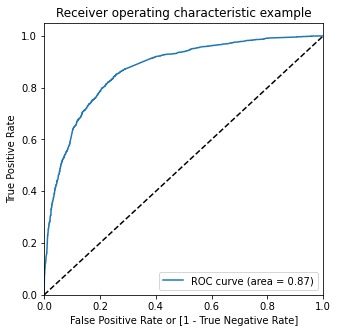

In [150]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

- ROC curve is towards left & has area covered upto **0.87**.
- Hence it is a good predictive model

## Finding an Optimal cut off point.

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [151]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.176052,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.003942,1012,0,1,0,0,0,0,0,0,0,0,0
2,0,0.211588,9226,0,1,1,1,0,0,0,0,0,0,0
3,1,0.885477,4750,1,1,1,1,1,1,1,1,1,1,0
4,1,0.708665,7987,1,1,1,1,1,1,1,1,1,0,0


In [152]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.569517  0.976288  0.314725
0.2   0.2  0.728232  0.914554  0.611524
0.3   0.3  0.784286  0.845871  0.745711
0.4   0.4  0.794521  0.766149  0.812292
0.5   0.5  0.799244  0.688471  0.868630
0.6   0.6  0.778775  0.560098  0.915749
0.7   0.7  0.764761  0.479150  0.943662
0.8   0.8  0.738309  0.374080  0.966453
0.9   0.9  0.700520  0.245298  0.985659


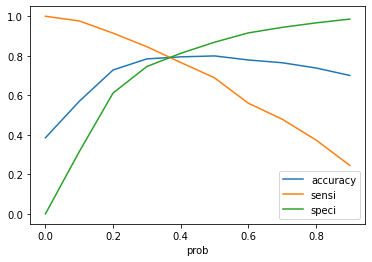

In [153]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

- From above graph and the table it can be seen that optimal cutoff is around 0.35 

In [154]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.176052,3009,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.003942,1012,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.211588,9226,0,1,1,1,0,0,0,0,0,0,0,0
3,1,0.885477,4750,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.708665,7987,1,1,1,1,1,1,1,1,1,0,0,1


#### Accuracy

In [155]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7920012596441506

In [156]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3046,  859],
       [ 462, 1984]], dtype=int64)

In [157]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

#### Sensitivity

In [158]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8111201962387572

#### Specificity 

In [159]:
# Let us calculate specificity
TN / float(TN+FP)

0.7800256081946223

In [160]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.21997439180537773


In [161]:
# Positive predictive value 
print (TP / float(TP+FP))

0.6978543791769258


In [162]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8683010262257697


## Precision & Recall

#### Precision

In [163]:
# Precision
TP/(TP+FP)

0.6978543791769258

#### Recall

In [164]:
# Recall
TP / (TP + FN)

0.8111201962387572

## Precision and Recall Tradeoff

- As we all know that Precision and Recall are inversely related means if one increases other will genuinely decrease. Hence we need to see the trade off between these two. Let's check that in below graph.

In [165]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    1
 6349    0
 6350    0
 Name: Predicted, Length: 6351, dtype: int64)

In [166]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

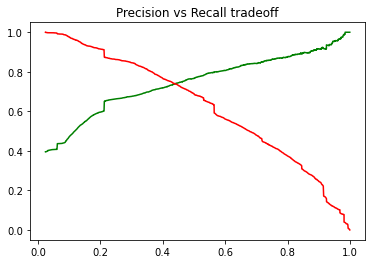

In [167]:
plt.title('Precision vs Recall tradeoff')
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Prediction on Test Set

In [168]:
# Transforming(Scaling) the 3 numerical variables.
X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Bing,Lead Source_Blog,Lead Source_Click2call,Lead Source_Direct traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live chat,Lead Source_Nc_edm,Lead Source_Olark chat,Lead Source_Organic search,Lead Source_Pay per click ads,Lead Source_Press_release,Lead Source_Reference,Lead Source_Referral sites,Lead Source_Social media,Lead Source_Testone,Lead Source_Welearn,Lead Source_Welearnblog_home,Lead Source_Welingak website,Lead Source_Youtubechannel,Last Activity_Approached upfront,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unknown,Last Notable Activity_Approached upfront,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3271,0.102194,-0.600595,0.773206,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1490,0.295588,1.887326,1.249642,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
7936,-0.284595,-0.752879,-0.179666,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4216,-0.671384,-0.888650,-1.132538,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3830,0.875771,-0.587751,2.678951,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [169]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark chat,Lead Source_Welingak website,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,Specialization_Unknown,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable
3271,-0.600595,1,0,0,0,0,0,0,1,0,0,0
1490,1.887326,0,1,0,0,0,0,0,0,0,0,0
7936,-0.752879,1,0,0,0,0,0,0,1,0,0,0
4216,-0.888650,0,0,1,0,0,0,0,0,0,0,0
3830,-0.587751,0,1,0,0,0,0,0,0,0,0,0


In [170]:
X_test_sm = sm.add_constant(X_test)

In [171]:
# Making predictions on y test.
y_test_pred = res.predict(X_test_sm)

In [172]:
y_test_pred[:10]

3271    0.102233
1490    0.677745
7936    0.087646
4216    0.914434
3830    0.117041
1800    0.099654
6507    0.373315
4821    0.277010
4223    0.924491
4714    0.211588
dtype: float64

In [173]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [174]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [175]:
# Putting ID to index
y_test_df['ID'] = y_test_df.index

In [176]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [177]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,ID,0
0,0,3271,0.102233
1,1,1490,0.677745
2,0,7936,0.087646
3,1,4216,0.914434
4,0,3830,0.117041


In [178]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [179]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['ID','Converted','Converted_Prob'], axis=1)
# Initially there was reindex_axis but needed to change it.

In [180]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.35 else 0)

In [181]:
y_pred_final.head()

,ID,Converted,Converted_Prob,final_Predicted
0,3271,0,0.102233,0
1,1490,1,0.677745,1
2,7936,0,0.087646,0
3,4216,1,0.914434,1
4,3830,0,0.117041,0


#### Accuracy

In [182]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.7914065369078223

In [183]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1366,  368],
       [ 200,  789]], dtype=int64)

In [184]:
# Predicted     not_converted    converted
# Actual
# not_converted        1366      368
# converted            200       789

In [185]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

#### Sensitivity

In [186]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7977755308392316

#### Specificity

In [187]:
# Let us calculate specificity
TN / float(TN+FP)

0.7877739331026529

#### Precision

In [188]:
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.6819360414866033

#### Recall

In [189]:
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.7977755308392316

In [190]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.2122260668973472


In [191]:
# Positive predictive value 
print (TP / float(TP+FP))

0.6819360414866033


In [192]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8722860791826309


## Lead Score Assigning

In [193]:
# Creating new columns for lead number and lead score

y_pred_final['Lead Score']=y_pred_final['Converted_Prob'].apply(lambda x:round(x*100))

y_pred_final.head()

,ID,Converted,Converted_Prob,final_Predicted,Lead Score
0,3271,0,0.102233,0,10
1,1490,1,0.677745,1,68
2,7936,0,0.087646,0,9
3,4216,1,0.914434,1,91
4,3830,0,0.117041,0,12


# Final Observations

- Important features (in descending order) responsible for good conversion rate or the ones' which contributes more towards the probability of a lead getting converted are :
 - Last Notable Activity_Had a Phone Conversation
 - Lead Source_Welingak website
 - Lead Origin_Lead Add Form
 - Last Notable Activity_Unreachable
 - Last Notable Activity_SMS Sent
 - Lead Source_Olark chat
 - Total Time Spent on Website
 - Lead Origin_API
 - Last Activity_Olark Chat Conversation
 - Specialization_Unknown
 - Last Activity_Email Bounced
 - Lead Origin_Landing Page Submission

## Train Data

- Accuracy    = 79.20%
- Sensitivity= 81.11%
- Specificity= 78.00%
- Precision   = 69.78%
- Recall      = 81.11%

## Test Data

- Accuracy    = 79.14%
- Sensitivity= 79.77%
- Specificity= 78.77%
- Precision   = 68.19%
- Recall      = 79.77%

- As per our business objective, the recall percentage we will consider more valuable because it is okay if our precision is little low which means less hot lead customers but we don't want to left out any hot leads which are willing to get converted **hence our focus on this will be more on Recall than Precision**.

# Conclusion:

- Valuable Insights -

 - The Accuracy, Precision and Recall score we got from test set in aceptable range.
 - We have high recall score than precision score which we were exactly looking for. -
 - In business terms, this model has an ability to adjust with the company’s requirements in coming future.
 - This concludes that the model is in stable state.